# Minibatch SGD

In [70]:
import torch

dims = 2
train_n = 1000
train_data = torch.randn((train_n, dims))
train_answers = torch.sum(torch.square(train_data), 1)
test_n = 100
test_data = torch.randn((test_n, dims))
test_answers = torch.sum(torch.square(test_data), 1)

In [113]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(dims, 50)
        self.fc2 = nn.Linear(50, 1)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return x

net = Net().cuda()

In [132]:
import time

start_time = time.time()

M = 500
lr = 0.005
mses = []

for epoch in range(100):
    for i in range(0, train_n, M):
        net.zero_grad()
        data = train_data[i:i + M].cuda()
        answers = train_answers[i:i + M].cuda()
        out = net(data).reshape(M)
        mse = 1/M * torch.sum(torch.square(out - answers))
        
        if i == 0:
            mses.append(mse.item())
            
        mse.backward()
        
        for p in net.parameters():
            p.data -= lr * p.grad

print(time.time() - start_time)

0.15895986557006836


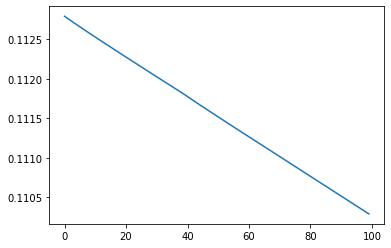

In [133]:
import matplotlib.pyplot as plt

plt.plot(mses)

In [135]:
net(torch.tensor([2, 1], dtype=torch.float, device='cuda'))

tensor([5.2304], device='cuda:0', grad_fn=<ReluBackward0>)